In [1]:
import pandas as pd

df = pd.read_csv("./data/data.csv")
df

,max_Temp,max_Temp.1,max_Temp.2,max_Temp.3,max_Temp.4,max_Temp.5,max_Temp.6,max_Temp.7,min_Temp,min_Temp.1,...,soil_Temp.4,soil_Temp.5,soil_Temp.6,soil_Temp.7,농가 수,재배면적,10a당 생산량,생산량,의성군재배면적,의성군생산량
0,180.0,13.400000,8.192748,-5.6,6.775,13.50,19.400,32.2,180.0,0.866111,...,3.350,9.95,15.575,23.0,13198,27689,1400,387671,1700.0,19262.0
1,162.0,14.089506,7.871772,0.1,6.950,14.85,20.100,31.1,162.0,2.311728,...,4.075,10.75,17.075,26.0,10376,25372,1432,363432,1444.0,14937.0
2,167.0,12.941916,8.863267,-9.3,6.800,14.80,19.500,29.7,167.0,0.683234,...,1.750,10.60,16.000,23.2,11495,21999,1402,312995,1340.0,13568.0
3,174.0,13.960920,8.868491,-6.5,7.325,14.05,21.575,31.3,174.0,1.198276,...,3.100,11.10,19.250,26.8,11228,22362,1220,290824,1246.0,12084.0
4,160.0,13.750625,8.302186,-6.0,6.950,14.60,20.300,31.5,160.0,0.023125,...,0.975,9.05,16.225,24.4,10691,24700,1288,312438,1215.0,11801.0


In [7]:
# 해당 df의 의성군 생산량과 관련한 상관계수 출력
df.corr()["의성군생산량"].sort_values(ascending=False).head(20)
# 1,      2,     3,  4,   5,   6,   7,   8
# count, mean, std, min, 25%, 50%, 75%, max
# 1등 : 의성군 재배면적
# 2등 : 풍량의 최솟값
# 3등 : 전국 생산량
# 4등 : 풍속의 25분위 값
# 5등 : 풍속의 50분위 값
# 6등 : 일사량

의성군생산량            1.000000
의성군재배면적           0.998614
wind.4            0.926697
생산량               0.920223
widdir.5          0.909000
widdir.6          0.907941
sun_Qy.4          0.896300
widdir.1          0.891596
wind.6            0.882545
wind.2            0.863240
wind.1            0.853630
min_Temp.4        0.851494
condens_Time.1    0.846983
sun_Qy.6          0.837846
wind.5            0.799810
condens_Time.5    0.798698
재배면적              0.794473
condens_Time.6    0.782093
농가 수              0.778062
sun_Time.7        0.701341
Name: 의성군생산량, dtype: float64

In [11]:
df = pd.read_csv("./data/data.csv")

df = df.loc[:, (df != 0).any(axis=0)]

print(df)


   max_Temp  max_Temp.1  max_Temp.2  max_Temp.3  max_Temp.4  max_Temp.5  \
0     180.0   13.400000    8.192748        -5.6       6.775       13.50   
1     162.0   14.089506    7.871772         0.1       6.950       14.85   
2     167.0   12.941916    8.863267        -9.3       6.800       14.80   
3     174.0   13.960920    8.868491        -6.5       7.325       14.05   
4     160.0   13.750625    8.302186        -6.0       6.950       14.60   

   max_Temp.6  max_Temp.7  min_Temp  min_Temp.1  ...  soil_Temp.4  \
0      19.400        32.2     180.0    0.866111  ...        3.350   
1      20.100        31.1     162.0    2.311728  ...        4.075   
2      19.500        29.7     167.0    0.683234  ...        1.750   
3      21.575        31.3     174.0    1.198276  ...        3.100   
4      20.300        31.5     160.0    0.023125  ...        0.975   

   soil_Temp.5  soil_Temp.6  soil_Temp.7   농가 수   재배면적  10a당 생산량     생산량  \
0         9.95       15.575         23.0  13198  27689    

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 불러오기
data = df

# 독립 변수(X)와 종속 변수(y)를 나누기
X = data.drop(columns=['의성군생산량'])
y = data['의성군생산량']

# 다중공선성 확인
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variables'] = X.columns
    vif_data['VIF'] = [sm.OLS(X[col], sm.add_constant(X.drop(columns=[col]))).fit().rsquared for col in X.columns]
    return vif_data

vif = calculate_vif(X)
print(vif)

# 다중공선성이 높은 변수 제거
max_vif = max(vif['VIF'])
while max_vif > 5:  # 임계값은 상황에 따라 조절 가능합니다.
    max_vif_index = vif[vif['VIF'] == max_vif].index[0]
    X = X.drop(columns=[X.columns[max_vif_index]])
    vif = calculate_vif(X)
    max_vif = max(vif['VIF'])

# 최종 다중공선성 확인
print(vif)


     Variables  VIF
0     max_Temp  1.0
1   max_Temp.1  1.0
2   max_Temp.2  1.0
3   max_Temp.3  1.0
4   max_Temp.4  1.0
..         ...  ...
73        농가 수  1.0
74        재배면적  1.0
75    10a당 생산량  1.0
76         생산량  1.0
77     의성군재배면적  1.0

[78 rows x 2 columns]
     Variables  VIF
0     max_Temp  1.0
1   max_Temp.1  1.0
2   max_Temp.2  1.0
3   max_Temp.3  1.0
4   max_Temp.4  1.0
..         ...  ...
73        농가 수  1.0
74        재배면적  1.0
75    10a당 생산량  1.0
76         생산량  1.0
77     의성군재배면적  1.0

[78 rows x 2 columns]


In [14]:
df.corr()["의성군생산량"].sort_values(ascending=False).head(20)

의성군생산량            1.000000
의성군재배면적           0.998614
wind.4            0.926697
생산량               0.920223
widdir.5          0.909000
widdir.6          0.907941
sun_Qy.4          0.896300
widdir.1          0.891596
wind.6            0.882545
wind.2            0.863240
wind.1            0.853630
min_Temp.4        0.851494
condens_Time.1    0.846983
sun_Qy.6          0.837846
wind.5            0.799810
condens_Time.5    0.798698
재배면적              0.794473
condens_Time.6    0.782093
농가 수              0.778062
sun_Time.7        0.701341
Name: 의성군생산량, dtype: float64

C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.draw()
C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.draw()
C:\Users\mathn\AppData\Roaming\Python\Python38\site-packages\seaborn\utils.py:61: UserWarning: 

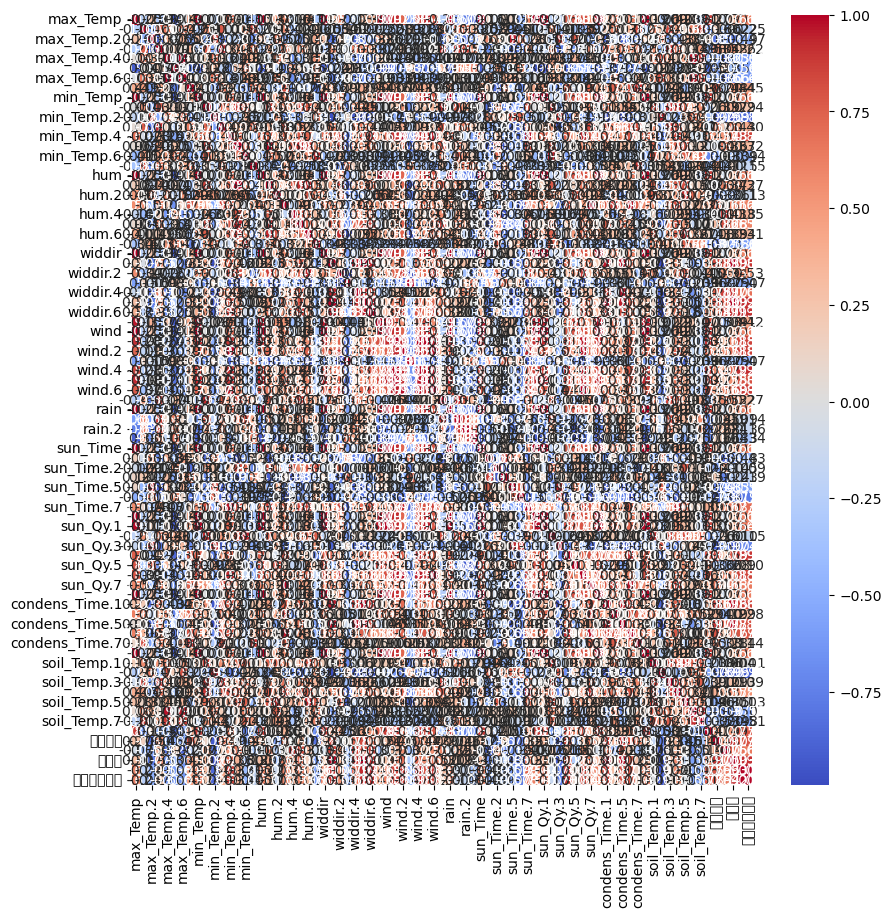

In [15]:
# df에 있는 모들 열들에 대해서 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 히트 그래프
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()